In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

We'll use the iris dataset, which consist of 3 species of iris flower, however for practicality sake, we'll group 2 species, so we end up with a binary classification problem.

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

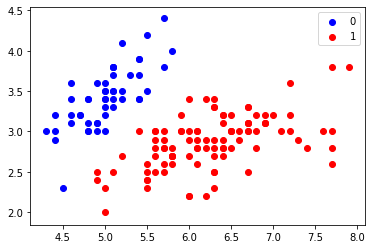

In [3]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

We'll use the logistic function :
$\LARGE\sigma=\frac {1} {1+e^{-X }}$

In [4]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def gradient_descent(X, y, n_iterations=300000, learning_rate=0.1):
    theta = np.zeros(X.shape[1])
    for iteration in range(n_iterations):
        z = X @ theta
        h = sigmoid(z)
        gradient = X.T @ (h - y) / y.size
        theta -= learning_rate * gradient

        
    return theta

In [5]:
X_b = np.c_[np.ones((X.shape[0],X.shape[1]-1)), X] # Adding Bias

In [6]:
theta = gradient_descent(X_b, y)
print(theta)

[-25.89066442  12.523156   -13.40150447]


We'll then make our predictions, and since our activation function returns a value between 0 and 1, we'll use 0.5 as  a threshold to determine if the prediction is 0 or 1.

In [7]:
predict = sigmoid(X_b @ theta) # Making predictions. Simply added sigmoid over our dot product.

for i in range(10):
    index = np.random.randint(0,y.shape[0])
    print(f"Actual Value: {y[index]}", "Predicted Value:", ('0' if predict[index] < 0.5 else '1'))

Actual Value: 1 Predicted Value: 1
Actual Value: 1 Predicted Value: 1
Actual Value: 0 Predicted Value: 0
Actual Value: 1 Predicted Value: 1
Actual Value: 1 Predicted Value: 1
Actual Value: 0 Predicted Value: 0
Actual Value: 1 Predicted Value: 1
Actual Value: 1 Predicted Value: 1
Actual Value: 1 Predicted Value: 1
Actual Value: 1 Predicted Value: 1


Here we go. Of course, these predictions are on seen data, but it would work the same on unseen data.